### Homework 2

Bu ödevde amacımız elimizde fikir sahibi olmadığımız bir verisetine istatistiksel yöntemler uygulayarak bir fikir elde etmek

## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import imshow
from PIL import Image
# klasik importlar burada birşey yok

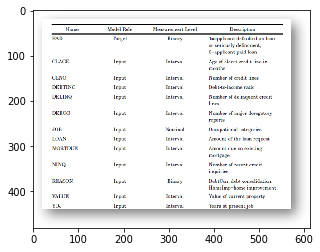

In [3]:
pil_im = Image.open('Data_desc.png', 'r')
imshow(np.asarray(pil_im))
# ekran görüntüsü belki lazım olur

## Data

In [4]:
data=pd.read_csv('hmelq.csv')
#veriseti notebook pathinde

In [5]:
data.head()
#veriyi doğru aldık headerlar değerler okunuyor

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [13]:
data.describe()
#biraz inceleyelim, öncelikle her sütun farklı sayıda entity içeriyor :(
# ortalama ve standart sapma değerleri şu anda birşey ifade etmiyor, boş değerlere bakmak lazım

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,3576.000000,3576.000000,3262.000000,3512.000000,3264.000000,3149.000000,3225.000000,3397.000000,3273.000000,3443.000000,2809.000000
mean,0.199385,18529.697987,74013.907992,101076.922759,8.832644,0.261670,0.432558,179.832529,1.186373,21.507116,33.831737
std,0.399594,11262.834060,44016.833772,54865.275351,7.568046,0.865178,1.099230,87.066198,1.728723,10.167490,9.061837
min,0.000000,1100.000000,2619.000000,8800.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,0.720000
25%,0.000000,11000.000000,46700.250000,65753.000000,3.000000,0.000000,0.000000,115.600000,0.000000,15.000000,29.140000
50%,0.000000,16200.000000,65858.000000,89183.000000,7.000000,0.000000,0.000000,173.640000,1.000000,20.000000,34.747000
75%,0.000000,23100.000000,91717.000000,118928.250000,13.000000,0.000000,0.000000,230.710000,2.000000,26.000000,38.940000
max,1.000000,89900.000000,399550.000000,850000.000000,41.000000,10.000000,15.000000,1168.230000,17.000000,71.000000,203.312000


In [15]:
data.info()
# farklı miktarda boş değerler görünüyor, 3576 en fazla sayıda entity bulunduran, temizlersek neye benzeyecek?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [12]:
data_clean=data.dropna()
# bir satırda NaN değeri varsa o satırı düşürüyor, kalan değerler bizim için temiz data

In [20]:
data_clean.describe()
# her sütun aynı miktarda veri içeriyor ve hepsinde değer var NaN yok

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
mean,0.088206,19010.257681,76337.035183,106899.244797,9.003964,0.150149,0.264123,180.645020,1.037661,22.265114,34.105829
std,0.283665,10768.607345,44476.368189,54026.707096,7.573012,0.580421,0.789816,84.420116,1.578414,9.457238,8.438411
min,0.000000,1700.000000,5076.000000,23031.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,4.030000
25%,0.000000,12000.000000,49577.250000,71287.250000,3.000000,0.000000,0.000000,118.205000,0.000000,16.000000,29.295500
50%,0.000000,16900.000000,67595.000000,94514.000000,7.000000,0.000000,0.000000,176.670000,0.000000,21.000000,34.949000
75%,0.000000,23600.000000,92922.750000,121220.750000,13.000000,0.000000,0.000000,229.692500,2.000000,27.000000,38.952000
max,1.000000,89900.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.230000,13.000000,64.000000,144.189000


In [21]:
data_clean.info()
#buradan da non null olduklarını kontrol ediyoruz
# Göze çarpan bir nokta var reason ve job object sınıfları, geri kalanı int veya float
# Öncelikle reason ve jobda kaç tane unique kategori var ve bunlar anlamlı mı diye bakacağız

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
reason     2018 non-null object
job        2018 non-null object
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 300.7+ KB


In [27]:
print(data_clean['reason'].unique())
print(data_clean['job'].unique())
# reason için 2 job için 6 adet unique değer var, kullanılabilir

['DebtCon' 'HomeImp']
['Mgr' 'Office' 'Other' 'ProfEx' 'Sales' 'Self']


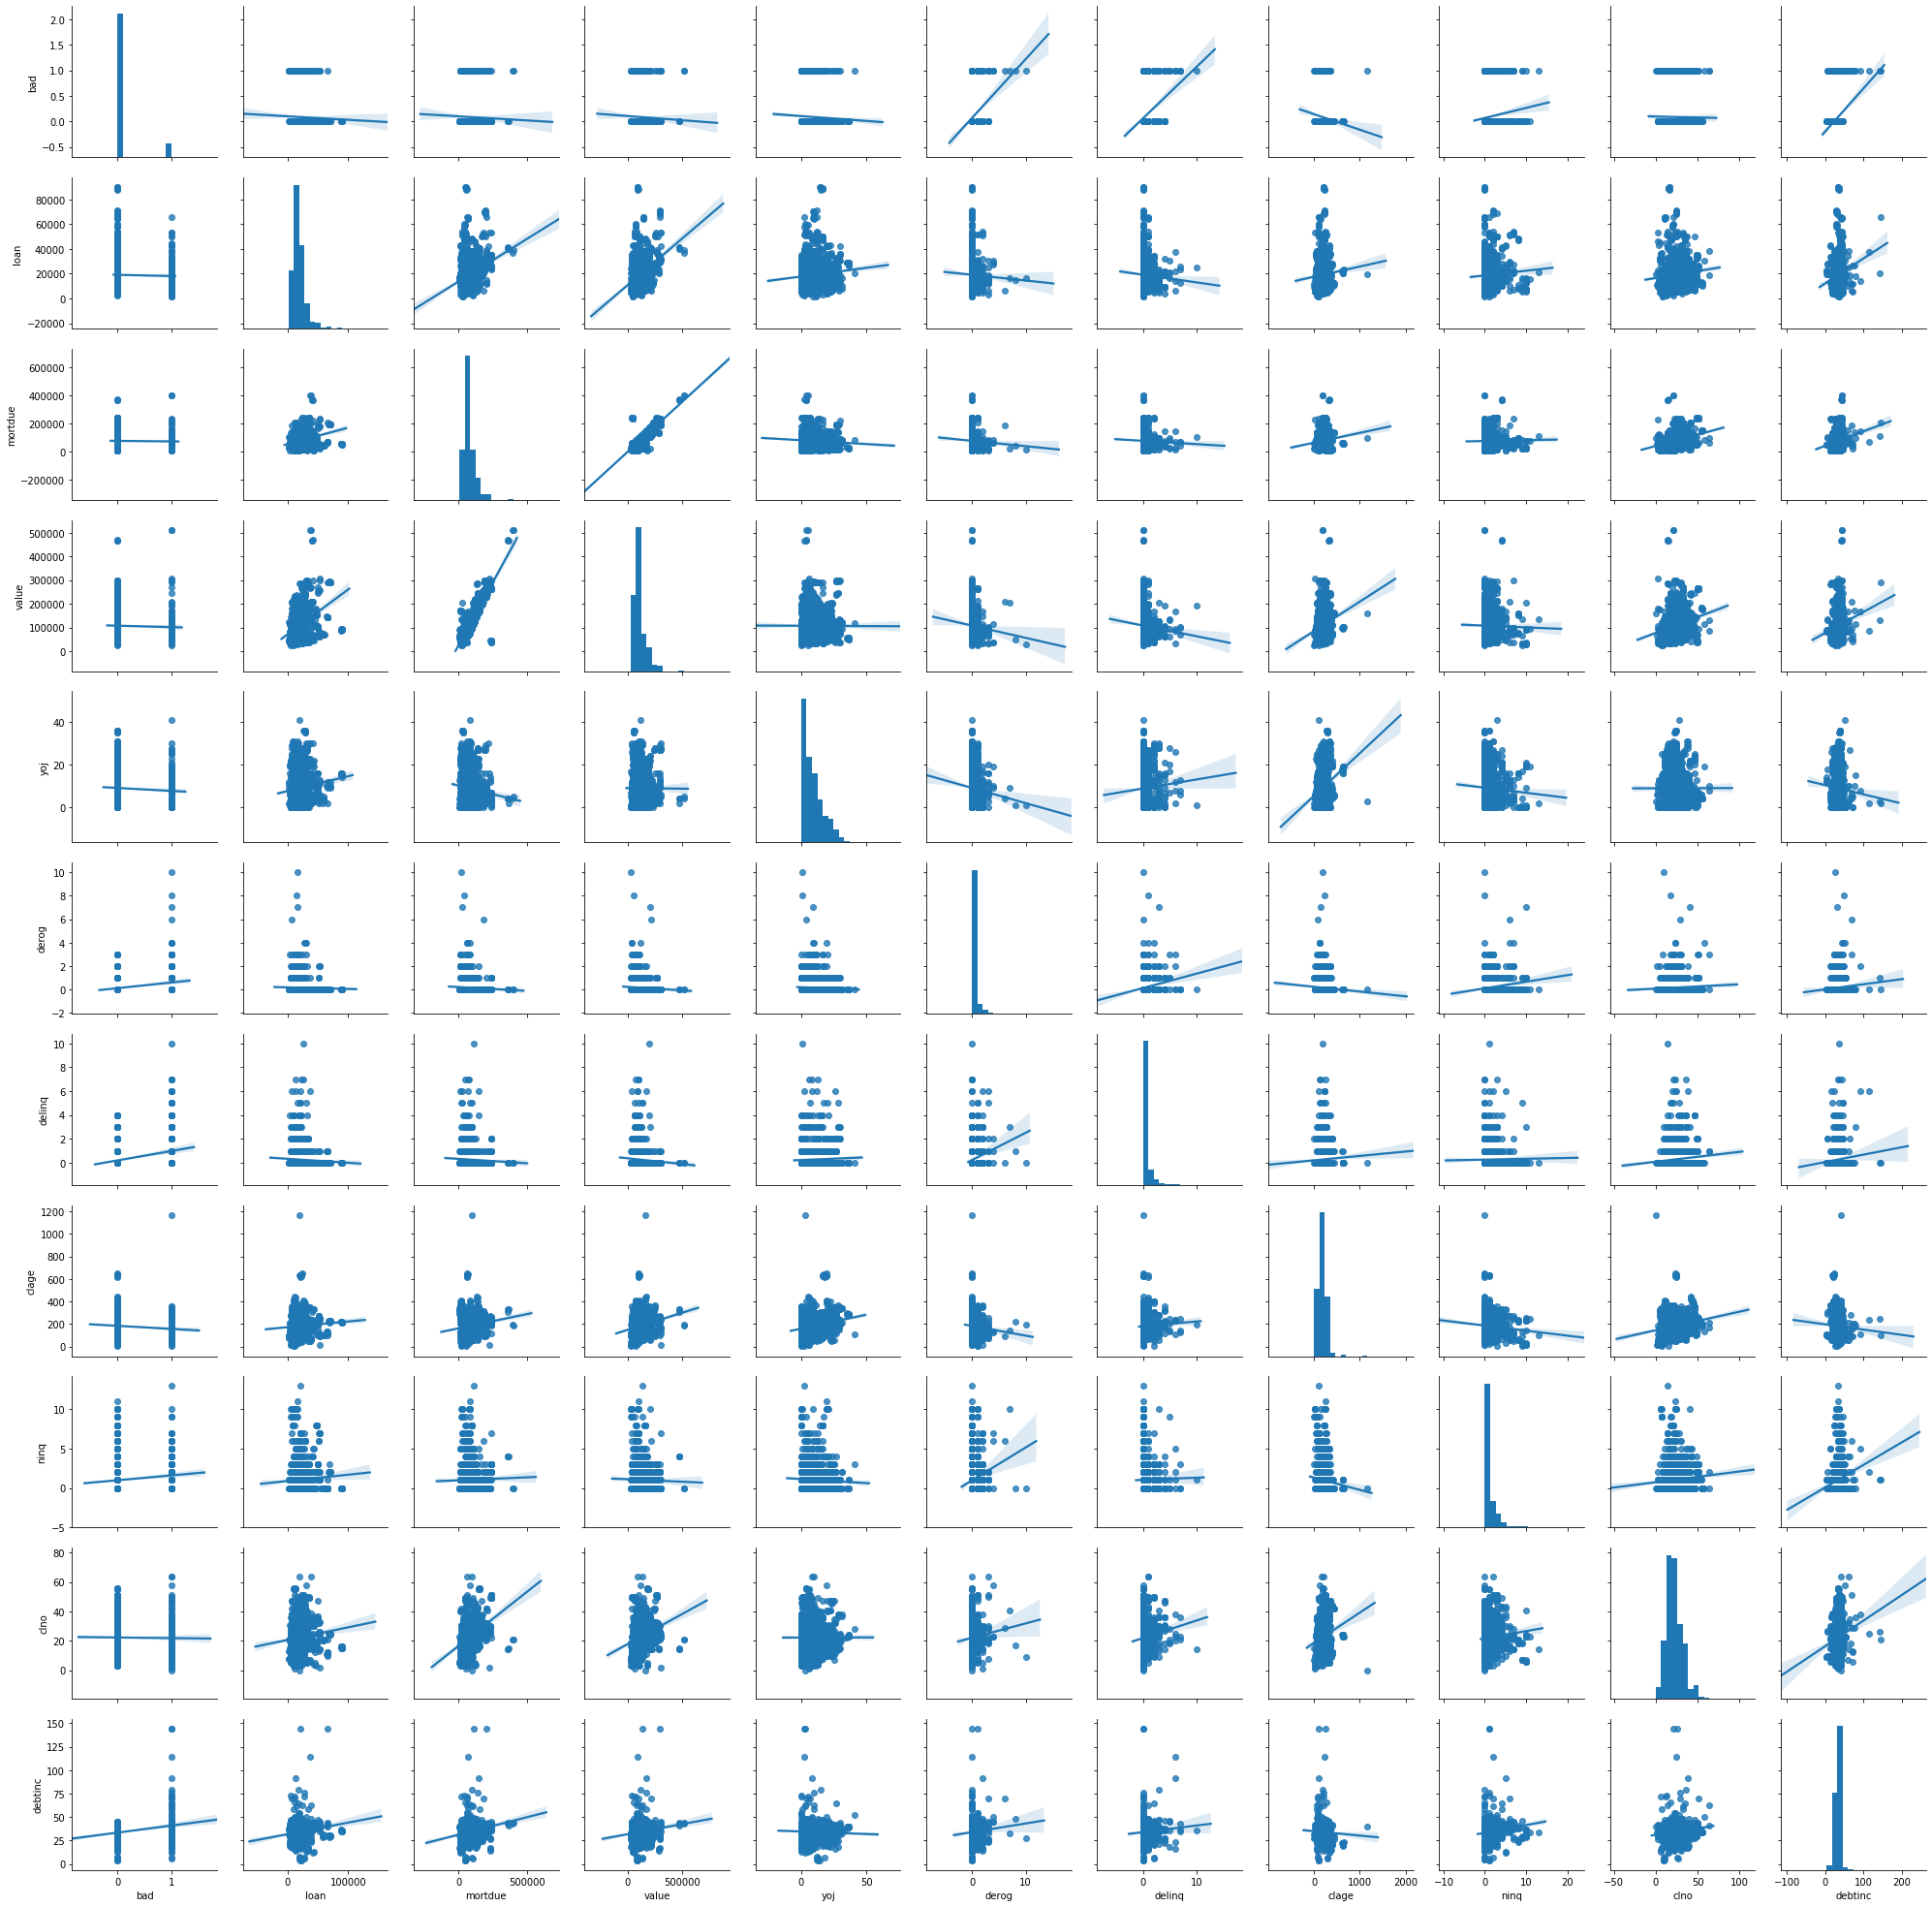

In [29]:
sns.pairplot(data_clean.drop(['reason','job'],axis=1),kind="reg")
# çok fazla plot var net değil, bazıları korelasyon belirtisi gösteriyor, korelasyon plotuna göre tekrar çizilebilir

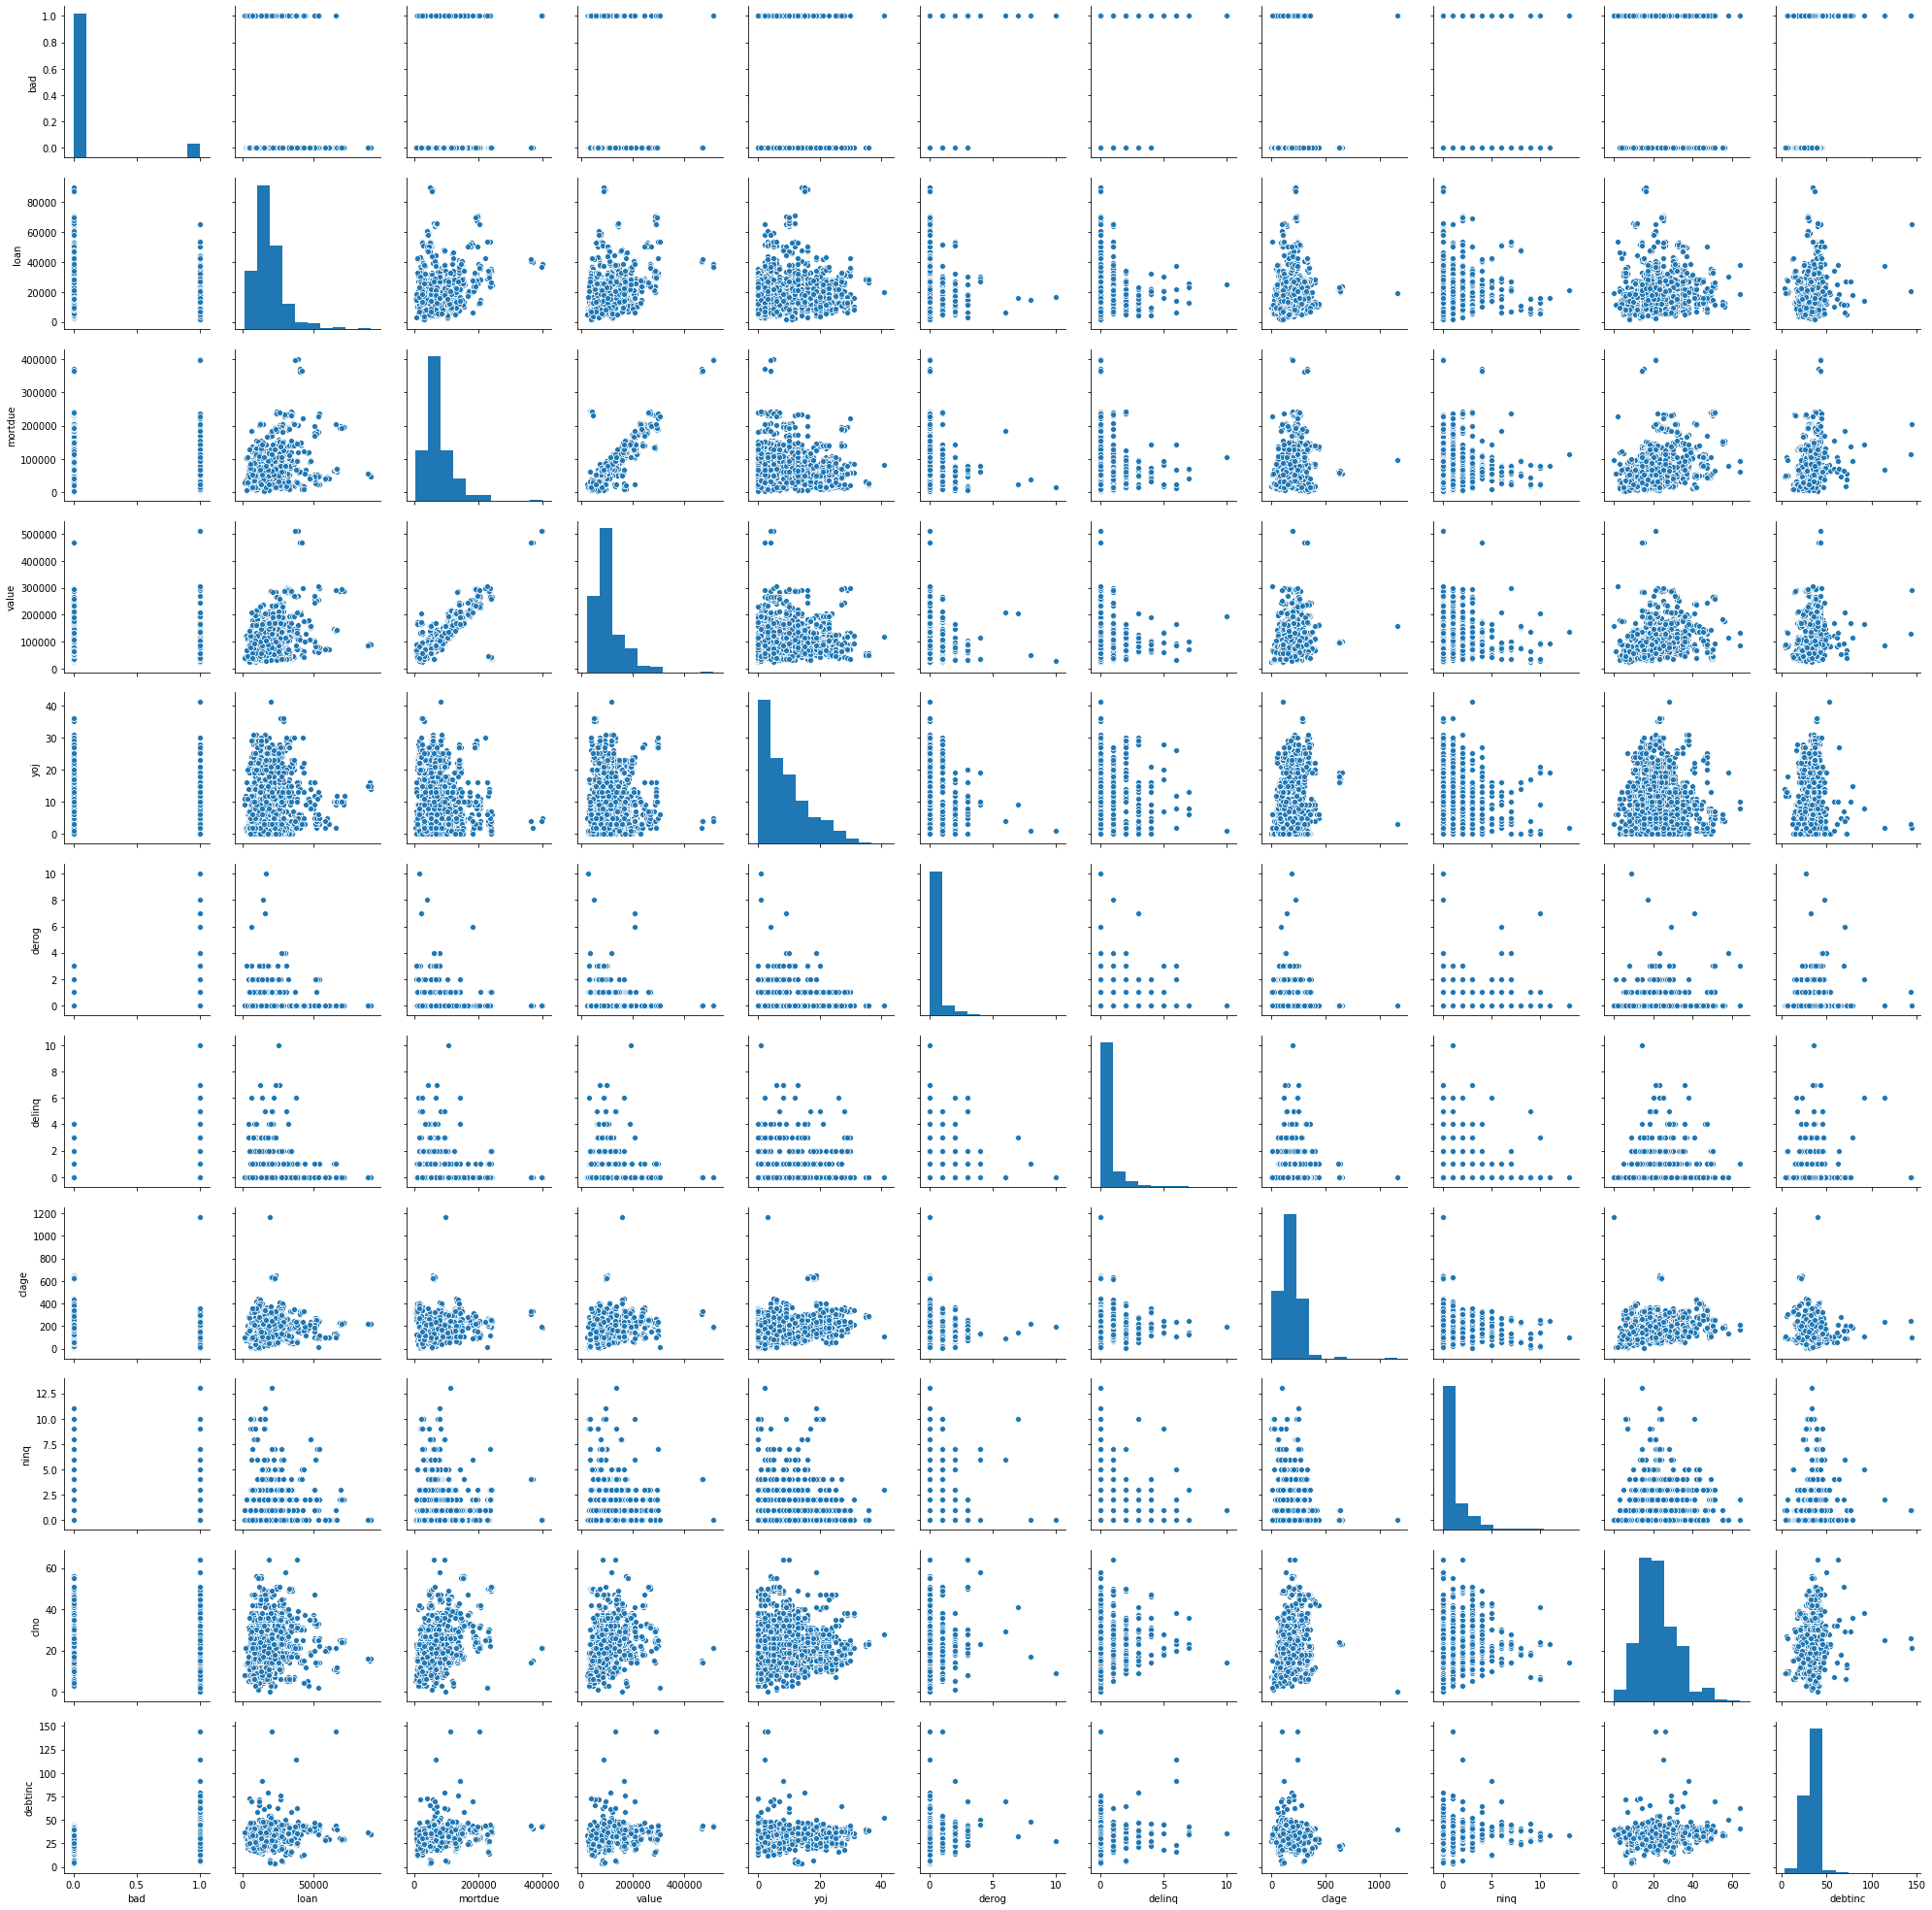

In [30]:
sns.pairplot(data_clean.drop(['reason','job'],axis=1),kind="scatter")

In [18]:
corr=data_clean.corr()
#artık korelasyon matrisi corr

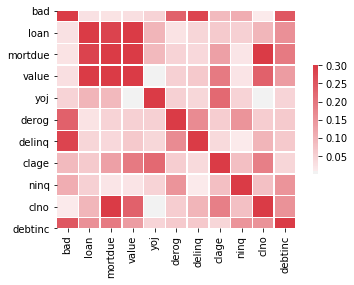

In [37]:
#normalize edilmiş bir korelasyon matrisini tercih ettiğim için bu eklemeleri yapmayı düşündüm
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr.abs(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
# sonuçta negatif yada pozitif korelasyon bizim için önemli, bizim amacımız hangi iki parametre ilintili diye bulmak, 
# artarken azalıyor veya artıyor olması çok fark etmiyor

In [40]:
# matris güzel ama renkler içinde kaybolmak mümkün, bize en yüksekleri gösteren küçük bir yardımcı yazsak iyi olur
c = data.corr().abs() # tekrar absolute değerleri kullanalım
s = c.unstack()
so = s.sort_values(kind="quicksort") #hızlıca sıralasın bu değerleri

In [41]:
so[-20-len(data.columns):-len(data.columns)+2]

clage    yoj        0.184283
yoj      clage      0.184283
clno     clage      0.221071
clage    clno       0.221071
loan     mortdue    0.229546
mortdue  loan       0.229546
derog    delinq     0.234706
delinq   derog      0.234706
bad      debtinc    0.236738
debtinc  bad        0.236738
derog    bad        0.270980
bad      derog      0.270980
value    clno       0.290439
clno     value      0.290439
value    loan       0.337453
loan     value      0.337453
clno     mortdue    0.340139
mortdue  clno       0.340139
bad      delinq     0.345548
delinq   bad        0.345548
value    mortdue    0.873280
mortdue  value      0.873280
dtype: float64

In [ ]:
# görüldüğü üzere